[View in Colaboratory](https://colab.research.google.com/github/AmoDinho/Machine-Learning-Crash-Course-with-TF/blob/master/examples/Mashable.ipynb)

# Predicting the number of shares in social networks on Mashable's articles

This dataset was obtained from the [UCI Machine Learning Repo](https://archive.ics.uci.edu/ml/datasets/). The goal is really simple, we will use a linear regression model to predict the number of shares on social media of Mashable's articles based on the number of words in the content using Tensor Flow.  

# Learning Objectives



*   Use the LinearRefressor class in TF tp predict the number the shares based on the number of words in the content. 



# Setup 



In [1]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

Lets load our data Set

In [2]:
mashable_df = pd.read_csv("https://storage.googleapis.com/machinelearning_datasets/Mashable/OnlineNewsPopularity.csv", sep=",")

In [6]:
mashable_df.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.7,1.0,0.8,4.0,2.0,1.0,...,0.1,0.7,-0.3,-0.6,-0.2,0.5,-0.2,0.0,0.2,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.6,1.0,0.8,3.0,1.0,1.0,...,0.0,0.7,-0.1,-0.1,-0.1,0.0,0.0,0.5,0.0,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.6,1.0,0.7,3.0,1.0,1.0,...,0.1,1.0,-0.5,-0.8,-0.1,0.0,0.0,0.5,0.0,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.5,1.0,0.7,9.0,0.0,1.0,...,0.1,0.8,-0.4,-0.6,-0.2,0.0,0.0,0.5,0.0,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.4,1.0,0.5,19.0,19.0,20.0,...,0.0,1.0,-0.2,-0.5,-0.1,0.5,0.1,0.0,0.1,505


In [0]:
mashable_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [0]:
mashable_df.describe()


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,...,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0,39644.0
mean,354.5,10.4,546.5,0.5,1.0,0.7,10.9,3.3,4.5,1.2,...,0.1,0.8,-0.3,-0.5,-0.1,0.3,0.1,0.3,0.2,3395.4
std,214.2,2.1,471.1,3.5,5.2,3.3,11.3,3.9,8.3,4.1,...,0.1,0.2,0.1,0.3,0.1,0.3,0.3,0.2,0.2,11627.0
min,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,1.0
25%,164.0,9.0,246.0,0.5,1.0,0.6,4.0,1.0,1.0,0.0,...,0.1,0.6,-0.3,-0.7,-0.1,0.0,0.0,0.2,0.0,946.0
50%,339.0,10.0,409.0,0.5,1.0,0.7,8.0,3.0,1.0,0.0,...,0.1,0.8,-0.3,-0.5,-0.1,0.1,0.0,0.5,0.0,1400.0
75%,542.0,12.0,716.0,0.6,1.0,0.8,14.0,4.0,4.0,1.0,...,0.1,1.0,-0.2,-0.3,-0.1,0.5,0.1,0.5,0.2,2800.0
max,731.0,23.0,8474.0,701.0,1042.0,650.0,304.0,116.0,128.0,91.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.5,1.0,843300.0


# EDA

Lets do some  EDA on our  n_tokens_content data

In [23]:
content_tokens = mashable_df[' n_tokens_content']

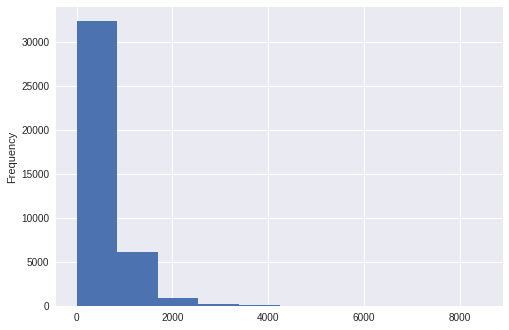

In [24]:
content_tokens.plot(kind='hist')
plt.show()

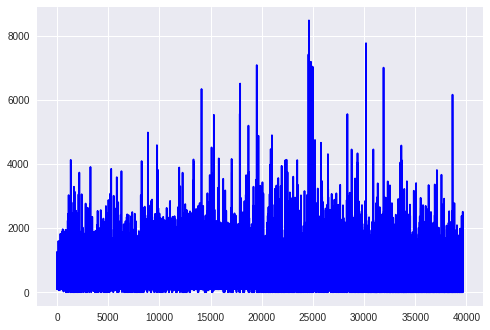

In [26]:
plt.plot(content_tokens,color='blue')

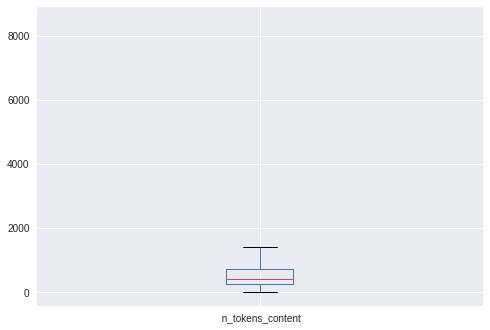

In [27]:
content_tokens.plot(kind='box')

Lets do EDA on our shares data

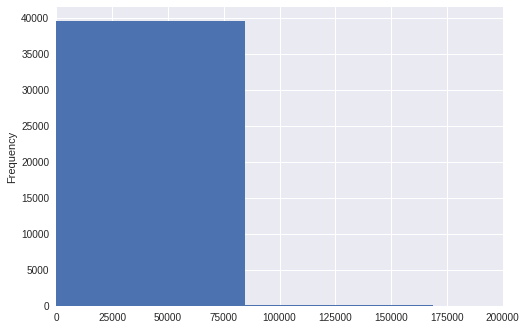

In [18]:
mashable_df[' shares'].plot(kind='hist')
plt.xlim((0,199999))
plt.show()

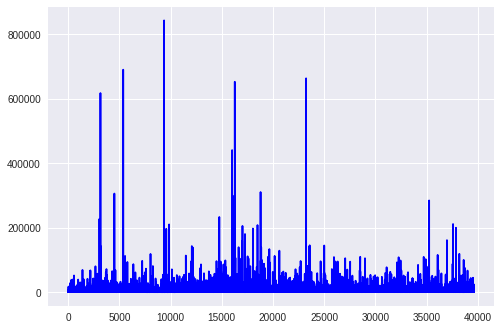

In [19]:
num_shares = mashable_df[' shares']
plt.plot(num_shares,color='blue')

In [21]:
num_shares.count()
num_shares.max()

843300

In [0]:
df.plot(kind='scatter',x=' n_tokens_content' , y=' shares')
plt.show()

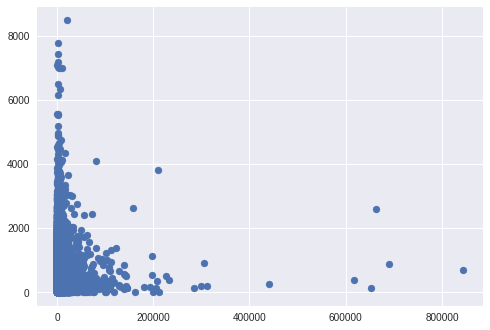

In [28]:
plt.scatter(num_shares, content_tokens)
plt.show()

#Data Preprocessing


In [30]:
num_shares.unique()

array([  593,   711,  1500, ..., 34500, 25600, 45000])

In [33]:
num_shares.notnull().all()

True

In [32]:
content_tokens.notnull().all()

True

With that all done now we can start building our ML pipeline

# ML Pipline

In [0]:
#Define input feature
my_feature = content_tokens

#make a numeric feature column for n_token_content
feature_columns = [tf.feature_column.numeric_column("total_words")]

In [0]:
#lets define our target label
targets = num_shares

## Build the linear regressor

In [0]:
#Using gradient descent as the optimizer for training our model
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# configure the linear reg model with feature cols and optimizer
linear_regressor = tf.estimator.LinearRegressor(
     feature_columns=feature_columns,
     optimizer=my_optimizer
)

## Create the input function